In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%matplotlib inline
import pandas as pd
# import geopandas
from osgeo import gdal     #gdal library was used to deal with raster data which we get from satellite

In [ ]:
!pip install xgboost

In [ ]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [ ]:
import xgboost as xg
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os

In [ ]:
os.chdir('')

'/content'

In [ ]:
os.listdir()

['.config', 'sample_data']

#Section to get familiar with implementation of gdal

In [ ]:
#this command give all the details about file 'Ktk_landsat8(19-20)/LC08_L2SP_145049_20181230_20200830_02_T1_SR_B4.TIF' which is a satellite image in tif format

!gdalinfo -nomd Ktk_landsat8(19-20)/LC08_L2SP_145049_20181230_20200830_02_T1_SR_B4.TIF

Driver: GTiff/GeoTIFF
Files: Ktk_landsat8(19-20)/LC08_L2SP_145049_20181230_20200830_02_T1_SR_B4.TIF
Size is 7561, 7721
Coordinate System is:
PROJCS["WGS 84 / UTM zone 43N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",75],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32643"]]
Origin = (534885.000000000000000,1873815.000000000000000)
Pixel Size = (30.000000000000000,-

In [ ]:
!gdalinfo -nomd LC08_L2SP_148038_20201224_20210310_02_T1_SR_B1.TIF

Driver: GTiff/GeoTIFF
Files: LC08_L2SP_148038_20201224_20210310_02_T1_SR_B1.TIF
Size is 7641, 7781
Coordinate System is:
PROJCS["WGS 84 / UTM zone 43N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",75],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32643"]]
Origin = (440085.000000000000000,3628215.000000000000000)
Pixel Size = (30.000000000000000,-30.000000000000000)


In [ ]:
file_name= 'LE07_L1GT_105018_20210528_20210528_02_RT_refl.tif'

In [ ]:
#To create file object

ds = gdal.Open(file_name)
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002846C23AF90> >

In [ ]:
#To list all the files in file object

print('File list:',ds.GetFileList())

File list: ['LE07_L1GT_105018_20210528_20210528_02_RT_refl.tif']


In [ ]:


print('Width:',ds.RasterXSize)

Width: 8571


In [ ]:
print('Height:',ds.RasterYSize)

Height: 7741


In [ ]:
print('Coordinate system:',ds.GetProjection())

Coordinate system: PROJCS["WGS 84 / UTM zone 56N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",153],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32656"]]


In [ ]:
gt = ds.GetGeoTransform()
gt

(375285.0, 30.0, 0.0, 6783315.0, 0.0, -30.0)

In [ ]:
print("origin:",(gt[0],gt[3]))
print("pixel size:",(gt[1],gt[5]))

origin: (375285.0, 6783315.0)
pixel size: (30.0, -30.0)


In [ ]:
#--------------get coordinates of any pixel-----------#

print('Upper left corner pixel location:',gdal.ApplyGeoTransform(gt,0,0))
print('Upper right corner pixel location:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('lower left corner pixel location:',gdal.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('lower right corner pixel location:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Center:',gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))


Upper left corner pixel location: [375285.0, 6783315.0]
Upper right corner pixel location: [632415.0, 6783315.0]
lower left corner pixel location: [375285.0, 6551085.0]
lower right corner pixel location: [632415.0, 6551085.0]
Center: [503850.0, 6667200.0]


In [ ]:
print('Metadata:',ds.GetMetadata())

Metadata: {'AREA_OR_POINT': 'Area'}


In [ ]:
print('Number of bands:', ds.RasterCount)

Number of bands: 3


In [ ]:
for i in range(1,ds.RasterCount+1):
    band = ds.GetRasterBand(i)       #in Gdal, band are indexed starting at 1
    interp= band.GetColorInterpretation()
    interp_name = gdal.GetColorInterpretationName(interp)
    (w,h)= band.GetBlockSize()
    print('Band {0:d}, block size {1:d} {2:d}, color interp {3:s}'.format(i,w,h,interp_name))

Band 1, block size 256 256, color interp Red
Band 2, block size 256 256, color interp Green
Band 3, block size 256 256, color interp Blue


In [ ]:
for i in range(1,ds.RasterCount+1):
    band= ds.GetRasterBand(i)
    (minimum, maximum, mean, stddev)= band.ComputeStatistics(False)
    print('Band{:d},min={:.3f},max={:.3f},mean={:.3f},stddev={:.3f}'.format(i, minimum, maximum, mean, stddev))

Band1,min=0.000,max=255.000,mean=55.572,stddev=57.750
Band2,min=0.000,max=255.000,mean=80.579,stddev=81.485
Band3,min=0.000,max=255.000,mean=81.539,stddev=83.032


In [ ]:
band= ds.GetRasterBand(1)

In [ ]:
data= band.ReadAsArray()
# with np.printoptions(threshold=np.inf):
print(data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


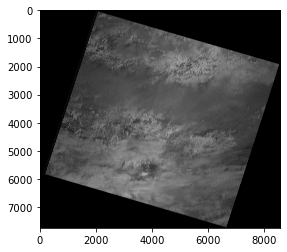

In [ ]:
plt.imshow(data,cmap='gray')

### Reading Partial Dataset

In [ ]:
data= band.ReadAsArray(xoff=4000,yoff=4000, win_xsize=512, win_ysize=512)

In [ ]:
data.shape

(512, 512)

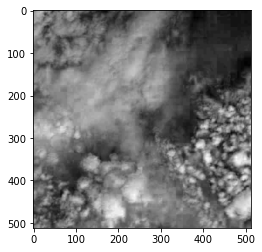

In [ ]:
plt.imshow(data, cmap='gray')

In [ ]:
del data
del ds

### Reading Raster Blockwise


In [ ]:
ds = gdal.Open(file_name)

In [ ]:
band = ds.GetRasterBand(1)

In [ ]:
x_size= ds.RasterXSize
y_size= ds.RasterYSize

In [ ]:
print(x_size,y_size)

8571 7741


In [ ]:
block_size_x, block_size_y = band.GetBlockSize()

In [ ]:
print(block_size_x,block_size_y)

256 256


In [ ]:
for x in range(0,x_size,block_size_x):
    if x+block_size_x < x_size:
        columns = block_size_x
    else:
        columns = x_size - x
        
    for y in range(0, y_size,block_size_y):
        if y+block_size_y < y_size:
            rows= block_size_y
            
        else:
            rows= y_size - y
            
    data = band.ReadAsArray(x,y,columns,rows)
    data= data*5

In [ ]:
print(data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Writing a Single Band Raster CreateCopy Method


In [ ]:
src_file= r'LE07_L1GT_105018_20210528_20210528_02_RT_refl.tif'
after_transform_filename= 'at_raster1.tif'
src_ds = gdal.Open(src_file)

In [ ]:
driver = gdal.GetDriverByName('GTiff')     #driver to write geotiff file
driver

<osgeo.gdal.Driver; proxy of <Swig Object of type 'GDALDriverShadow *' at 0x0000029856C72F60> >

In [ ]:
dst_ds = driver.CreateCopy(after_transform_filename, src_ds)

In [ ]:
data= src_ds.ReadAsArray()

In [ ]:
data.shape

(3, 7741, 8571)

In [ ]:
data= np.invert(data)

In [ ]:
data[1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

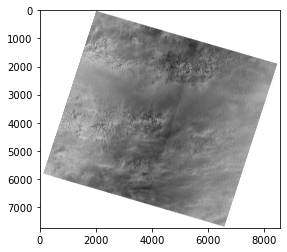

In [ ]:
plt.imshow(data[1],cmap='gray')

In [ ]:
out_band = dst_ds.GetRasterBand(1)

In [ ]:
out_band.WriteArray(data[1])

0

In [ ]:
out_band.FlushCache()

In [ ]:
del out_band

### Writing a Single Band Raster Create Method


##  Data Description

In [ ]:
from osgeo import osr

In [ ]:
crs= osr.SpatialReference()

In [ ]:
crs.SetWellKnownGeogCS('WGS84')

0

### Reading HDF Files

In [ ]:
hdf_file = r'MOD11_L2.A2018365.1755.006.2019029160834.hdf'

In [ ]:
ds= gdal.Open(hdf_file)

In [ ]:
print(ds)


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000113576CC360> >


In [ ]:
sds= ds.GetSubDatasets()

In [ ]:
sds

[('HDF4_EOS:EOS_SWATH:"MOD11_L2.A2018365.1755.006.2019029160834.hdf":MOD_Swath_LST:LST',
  '[2030x1354] LST MOD_Swath_LST (16-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"MOD11_L2.A2018365.1755.006.2019029160834.hdf":MOD_Swath_LST:QC',
  '[2030x1354] QC MOD_Swath_LST (16-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"MOD11_L2.A2018365.1755.006.2019029160834.hdf":MOD_Swath_LST:Error_LST',
  '[2030x1354] Error_LST MOD_Swath_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"MOD11_L2.A2018365.1755.006.2019029160834.hdf":MOD_Swath_LST:Emis_31',
  '[2030x1354] Emis_31 MOD_Swath_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"MOD11_L2.A2018365.1755.006.2019029160834.hdf":MOD_Swath_LST:Emis_32',
  '[2030x1354] Emis_32 MOD_Swath_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"MOD11_L2.A2018365.1755.006.2019029160834.hdf":MOD_Swath_LST:View_angle',
  '[2030x1354] View_angle MOD_Swath_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_SWATH:"MOD11_L2.A2018365.1755.006.20190291

In [ ]:
ds.GetProjection()

''

### Reading NetCDF Data in Python

In [ ]:
nc_file =r'soil_moist_chm_data.nc'

In [ ]:
os.getcwd()

'C:\\Users\\yoges\\Desktop\\Internship\\summer_internship\\Code\\dataset-satellite-soil-moisture-570e3850-897a-43ba-807a-eabce2a85d9e'

In [ ]:
os.chdir('C:\\Users\\yoges\\Desktop\\Internship\\summer_internship\\Code')

In [ ]:
data=(os.listdir())

In [ ]:
data

['.ipynb_checkpoints',
 'a_file.txt',
 'dataset-satellite-soil-moisture-570e3850-897a-43ba-807a-eabce2a85d9e',
 'dataset-satellite-soil-moisture-570e3850-897a-43ba-807a-eabce2a85d9e.zip',
 'Geospatial Data Analysis.ipynb',
 'Ktk_landsat8(19-20)',
 'label.txt',
 'MOD11_L2.A2018365.1755.006.2019029160834.hdf',
 'MOD13Q1.A2020353.h25v06.006.2021003224610.hdf',
 'NDVI',
 'smi_india_jan_2016.nc',
 'smi_jan_2016.nc',
 'smi_moonsoon_2018.csv',
 'smi_moonsoon_2019.csv',
 'smi_moonsoon_2020.csv',
 'smi_postmoonsoon_2018.csv',
 'smi_postmoonsoon_2019.csv',
 'smi_postmoonsoon_2020.csv',
 'soil_HWSD_FAO',
 'soil_HWSD_FAO.7z',
 'soil_moist_chm_data.nc',
 'spei01.nc',
 'SPEI_ 75.750000_  14.750000.csv',
 'SPEI_threshold_values.png',
 'test.txt',
 'test_img.txt',
 'test_label.txt',
 '_Daily District level PASM(%) values for Karnataka during monsoon_2018 season derived using Soil Water balance model-2021-07-07 1100.xls',
 '_Daily District level PASM(%) values for Karnataka during monsoon_2019 season d

In [ ]:
ds= gdal.Open(data[0])

In [ ]:
print(ds.GetMetadata())

{'cdm_data_type': 'Grid', 'comment': 'These data were produced as part of the Copernicus Climate Change Service. Service Contract No 2016/C3S_312a_LOT7_EODC/SC1', 'contact': 'C3S_SM_Science@eodc.eu', 'Conventions': 'CF-1.6', 'creator_email': 'C3S_SM_Science@eodc.eu', 'creator_name': 'Earth Observation Data Center (EODC)', 'creator_url': 'https://www.eodc.eu', 'date_created': '2019-02-04T13:20:52Z', 'freqbandID_flag_meanings': 'NaN L14 C66 C68 L14+C68 C69 L14+C69 C68+C69 L14+C68+C69 X107 L14+X107 C68+X107 L14+C68+X107 C69+X107 L14+C69+X107 K194', 'freqbandID_flag_values': '0 1 4 8 9 16 17 24 25 64 65 72 73 80 81 128 ', 'freqbandID_long_name': 'Frequency Band Identification', 'freqbandID__CoordinateAxes': 'time lat lon', 'freqbandID__FillValue': '0 ', 'freqbandID__Netcdf4Dimid': '0 ', 'geospatial_lat_max': '90.0', 'geospatial_lat_min': '-90.0', 'geospatial_lat_resolution': '0.25 degree', 'geospatial_lat_units': 'degrees_north', 'geospatial_lon_max': '180.0', 'geospatial_lon_min': '-180.0

In [ ]:
# this package is to print the metadata in a nice format
import pprint
pp= pprint.PrettyPrinter(compact=True)

In [ ]:
pp.pprint(ds.GetMetadata())

{'Conventions': 'CF-1.6',
 '_nc3_strict': '1 ',
 'cdm_data_type': 'Grid',
 'comment': 'These data were produced as part of the Copernicus Climate Change '
            'Service. Service Contract No 2016/C3S_312a_LOT7_EODC/SC1',
 'contact': 'C3S_SM_Science@eodc.eu',
 'creator_email': 'C3S_SM_Science@eodc.eu',
 'creator_name': 'Earth Observation Data Center (EODC)',
 'creator_url': 'https://www.eodc.eu',
 'date_created': '2019-02-04T13:20:52Z',
 'freqbandID__CoordinateAxes': 'time lat lon',
 'freqbandID__FillValue': '0 ',
 'freqbandID__Netcdf4Dimid': '0 ',
 'freqbandID_flag_meanings': 'NaN L14 C66 C68 L14+C68 C69 L14+C69 C68+C69 '
                             'L14+C68+C69 X107 L14+X107 C68+X107 L14+C68+X107 '
                             'C69+X107 L14+C69+X107 K194',
 'freqbandID_flag_values': '0 1 4 8 9 16 17 24 25 64 65 72 73 80 81 128 ',
 'freqbandID_long_name': 'Frequency Band Identification',
 'geospatial_lat_max': '90.0',
 'geospatial_lat_min': '-90.0',
 'geospatial_lat_resolution':

In [ ]:
sds=ds.GetSubDatasets()

In [ ]:
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000239439AEAB0> >

In [ ]:
data= ds.ReadAsArray()

In [ ]:
print(data)

None


In [ ]:
for sd, description in sds:
    print(description)
#     print(sd)

[1x720x1440] //freqbandID (16-bit integer)
[1x720x1440] //nobs (16-bit integer)
[1x720x1440] //sensor (16-bit integer)
[1x720x1440] //sm (32-bit floating-point)


In [ ]:
freqbandID= gdal.Open(sds[0][0])

In [ ]:
pp.pprint(freqbandID.GetMetadata())

{'Conventions': 'CF-1.6',
 '_nc3_strict': '1 ',
 'cdm_data_type': 'Grid',
 'comment': 'These data were produced as part of the Copernicus Climate Change '
            'Service. Service Contract No 2016/C3S_312a_LOT7_EODC/SC1',
 'contact': 'C3S_SM_Science@eodc.eu',
 'creator_email': 'C3S_SM_Science@eodc.eu',
 'creator_name': 'Earth Observation Data Center (EODC)',
 'creator_url': 'https://www.eodc.eu',
 'date_created': '2019-02-04T13:20:52Z',
 'geospatial_lat_max': '90.0',
 'geospatial_lat_min': '-90.0',
 'geospatial_lat_resolution': '0.25 degree',
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_max': '180.0',
 'geospatial_lon_min': '-180.0',
 'geospatial_lon_resolution': '0.25 degree',
 'geospatial_lon_units': 'degrees_east',
 'geospatial_vertical_max': '0.0',
 'geospatial_vertical_min': '0.0',
 'history': '2019-02-04T13:20:52.605640 mean calculated',
 'id': 'C3S-SOILMOISTURE-L3S-SSMV-PASSIVE-MONTHLY-20160101000000-TCDR-v201812.0.0.nc',
 'institution': 'EODC (AUT); TU Wien (

In [ ]:
freqbandID_data= freqbandID.ReadAsArray()

In [ ]:
print(freqbandID_data.shape)

(720, 1440)


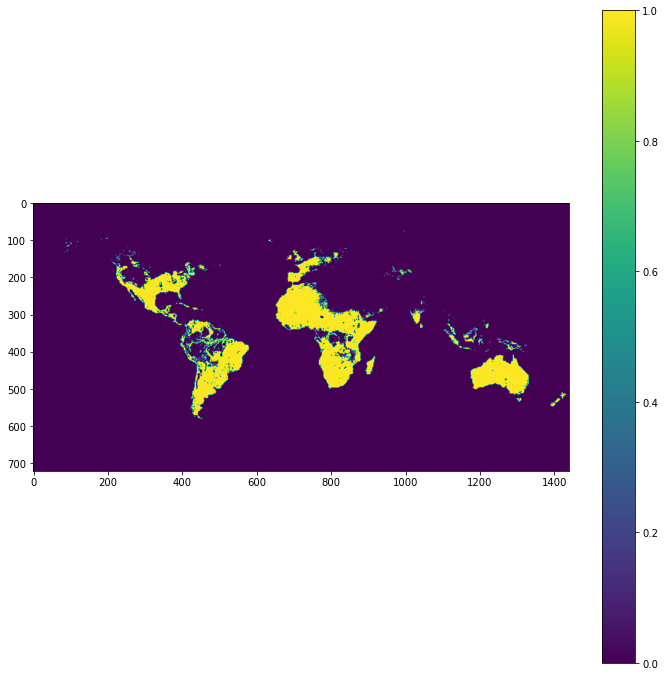

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(freqbandID_data)
plt.colorbar()

In [ ]:
sm_ds= gdal.Open(sds[3][0])

In [ ]:
print(sm_ds)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000023946CD3870> >


In [ ]:
pp.pprint(sm_ds.GetMetadata())

{'Conventions': 'CF-1.6',
 '_nc3_strict': '1 ',
 'cdm_data_type': 'Grid',
 'comment': 'These data were produced as part of the Copernicus Climate Change '
            'Service. Service Contract No 2016/C3S_312a_LOT7_EODC/SC1',
 'contact': 'C3S_SM_Science@eodc.eu',
 'creator_email': 'C3S_SM_Science@eodc.eu',
 'creator_name': 'Earth Observation Data Center (EODC)',
 'creator_url': 'https://www.eodc.eu',
 'date_created': '2019-02-04T13:20:52Z',
 'geospatial_lat_max': '90.0',
 'geospatial_lat_min': '-90.0',
 'geospatial_lat_resolution': '0.25 degree',
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_max': '180.0',
 'geospatial_lon_min': '-180.0',
 'geospatial_lon_resolution': '0.25 degree',
 'geospatial_lon_units': 'degrees_east',
 'geospatial_vertical_max': '0.0',
 'geospatial_vertical_min': '0.0',
 'history': '2019-02-04T13:20:52.605640 mean calculated',
 'id': 'C3S-SOILMOISTURE-L3S-SSMV-PASSIVE-MONTHLY-20160101000000-TCDR-v201812.0.0.nc',
 'institution': 'EODC (AUT); TU Wien (

In [ ]:
sm_data= sm_ds.ReadAsArray()

In [ ]:
sm_data.shape

(720, 1440)

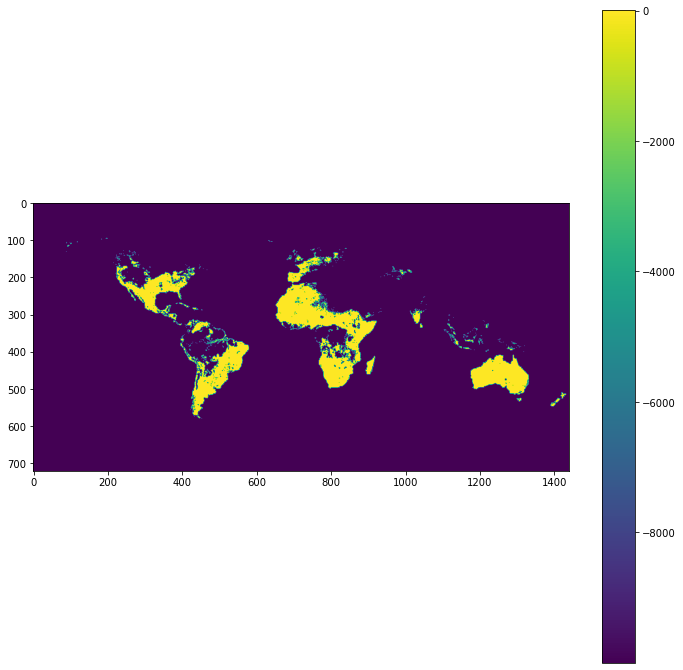

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(sm_data)
plt.colorbar()

### Stacking Raster bands

In [ ]:
file_name = ['LC08_L2SP_148038_20201224_20210310_02_T1_SR_B1.TIF','LC08_L2SP_148038_20201224_20210310_02_T1_SR_B2.TIF','LC08_L2SP_148038_20201224_20210310_02_T1_SR_B3.TIF','LC08_L2SP_148038_20201224_20210310_02_T1_SR_B4.TIF','LC08_L2SP_148038_20201224_20210310_02_T1_SR_B5.TIF']

In [ ]:
file_name[0]

'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B1.TIF'

In [ ]:
img_data=list()
for file in file_name:
    ds=gdal.Open(file)
    data= ds.ReadAsArray()
    img_data.append(data)

In [ ]:
print(img_data)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 

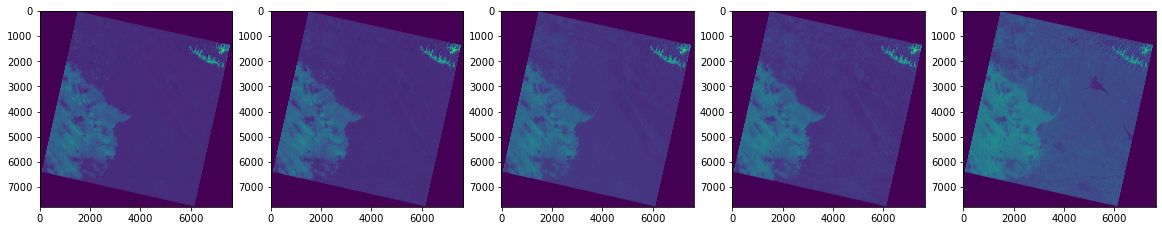

In [ ]:
fig= plt.figure(figsize=(20,15))
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(img_data[i-1])

In [ ]:
height, width= img_data[0].shape


In [ ]:
dst_file= 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_RGB.TIF'

In [ ]:
drv= gdal.GetDriverByName('GTiff')
dst_ds= drv.Create(dst_file,width,height,3,eType=gdal.GDT_UInt16)
dst_ds.SetProjection(ds.GetProjection())
dst_ds.SetGeoTransform(ds.GetGeoTransform())

0

In [ ]:
for i in range(1,3):
    band= dst_ds.GetRasterBand(i)
    band.WriteArray(img_data[i-1])

In [ ]:
print(band)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000001C407254540> >


In [ ]:
dst_ds.FlushCache()

In [ ]:
dst_ds= None 

In [ ]:
ds= gdal.Open(dst_file)

In [ ]:
data= ds.ReadAsArray(buf_type= gdal.GDT_Byte)

In [ ]:
rgb_data= np.dstack(tuple(data))

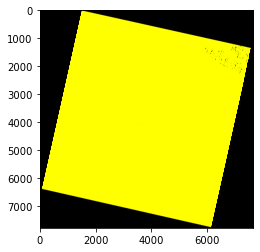

In [ ]:
plt.imshow(rgb_data)

In [ ]:
band4= img_data[3]    #red
band5= img_data[4]    #nir

In [ ]:
band4.shape

(7781, 7641)

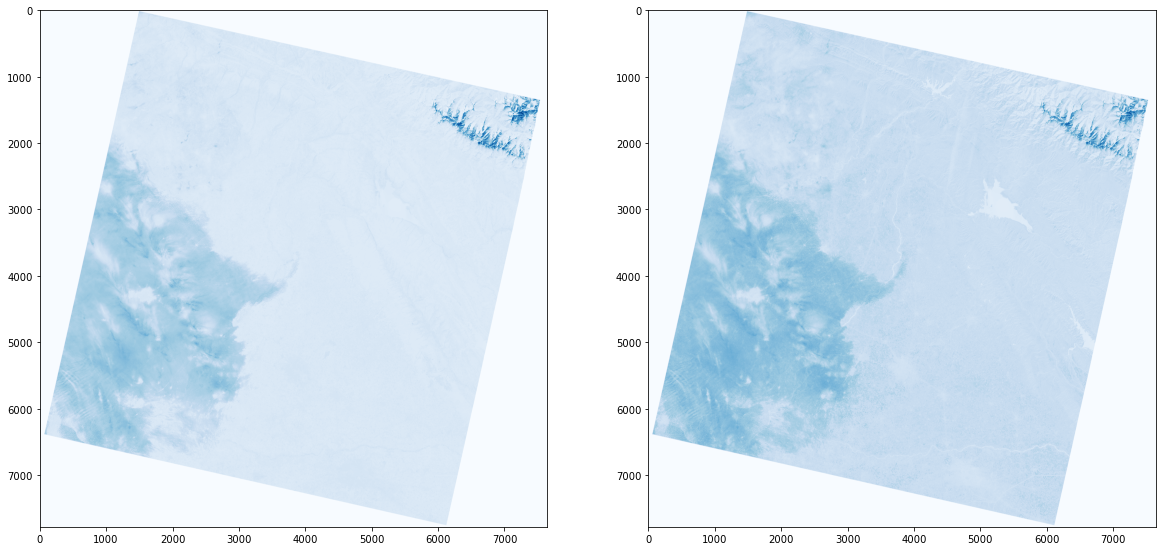

In [ ]:
#multiple band representation
fig= plt.figure(figsize=(20,15))
for i in range(4,6):
    plt.subplot(1,2,i-3)
    plt.imshow(img_data[i-1],cmap='Blues')


In [ ]:
red= band4.astype('float64')
nir= band5.astype('float64')

In [ ]:
red.dtype

dtype('float64')

In [ ]:
ndvi= np.where(
(nir+red)==0.,0,(nir-red)/(nir+red)
)

ndvi

<ipython-input-112-252c7f4298cb>:2: RuntimeWarning: invalid value encountered in true_divide
  (nir+red)==0.,0,(nir-red)/(nir+red)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

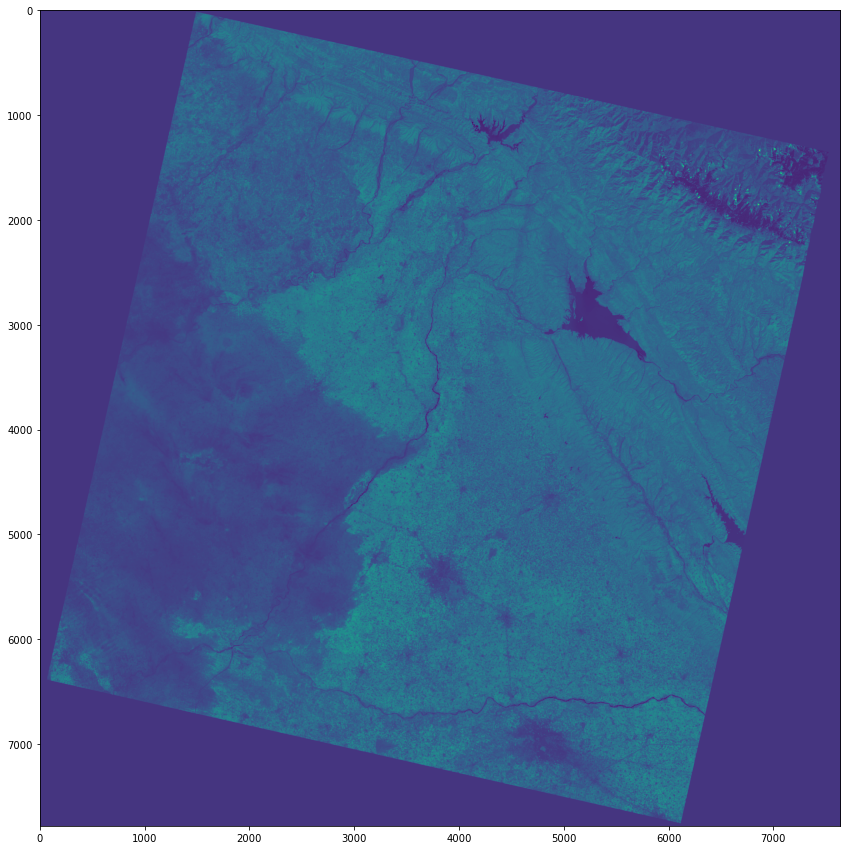

In [ ]:

fig= plt.figure(figsize=(20,15))
plt.imshow(ndvi)

In [ ]:
ndvi.shape

(7781, 7641)

In [ ]:
dst_file2= 'LC08_L2SP_148038_20201224_20210310_NdviImg.TIF'

In [ ]:
drv2= gdal.GetDriverByName('GTiff')
dst_ds2= drv2.Create(dst_file2,width,height,1,eType=gdal.GDT_Float64)
dst_ds2.SetProjection(ds.GetProjection())
dst_ds2.SetGeoTransform(ds.GetGeoTransform())

0

In [ ]:
band= dst_ds2.GetRasterBand(1)
band.WriteArray(ndvi)

0

In [ ]:
dst_ds2.FlushCache()

In [ ]:
dst_ds2= None

In [ ]:
ds= gdal.Open(dst_file2)

In [ ]:
data= ds.ReadAsArray()

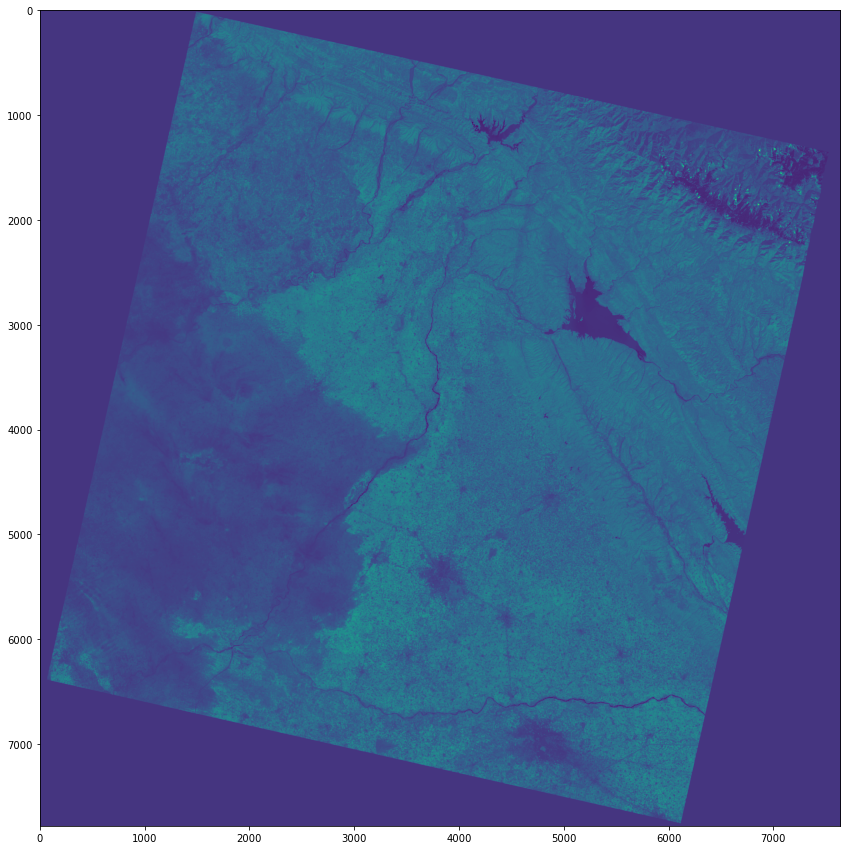

In [ ]:
fig= plt.figure(figsize=(20,15))
plt.imshow(data)

#Preprocessing of Landsat-8 data

### Importing files from the ktk folder


In [ ]:
#folder containing band4 & band5 images of Landsat-8
path='Ktk_landsat8(19-20)'

file_names=os.listdir(path)

In [ ]:
file_names[91]

'LC08_L2SP_145049_20180112_20200902_02_T1_SR_B4.TIF'

In [ ]:
ds= gdal.Open(os.path.join(path,file_names[5]))
print(ds)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000028404026E40> >


In [ ]:
print('File list:',ds.GetFileList())

File list: ['Ktk_landsat8(19-20)\\LC08_L2SP_145049_20160208_20200907_02_T1_SR_B5.TIF']


In [ ]:
print('Coordinate system:',ds.GetProjection())

Coordinate system: PROJCS["WGS 84 / UTM zone 43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32643"]]


In [ ]:
gt = ds.GetGeoTransform()
gt

(533685.0, 30.0, 0.0, 1873815.0, 0.0, -30.0)

In [ ]:
print("origin:",(gt[0],gt[3]))
print("pixel size:",(gt[1],gt[5]))

origin: (533685.0, 1873815.0)
pixel size: (30.0, -30.0)


In [ ]:
#--------------get coordinates of any pixel-----------#

print('Upper left corner pixel location:',gdal.ApplyGeoTransform(gt,0,0))
print('Upper right corner pixel location:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('lower left corner pixel location:',gdal.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('lower right corner pixel location:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Center:',gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))


Upper left corner pixel location: [533685.0, 1873815.0]
Upper right corner pixel location: [760515.0, 1873815.0]
lower left corner pixel location: [533685.0, 1642185.0]
lower right corner pixel location: [760515.0, 1642185.0]
Center: [647100.0, 1758000.0]


In [ ]:
#splitted the data into train and test set
train_files= (file_names[0:182])
test_files= (file_names[182:226])



In [ ]:

img_data=list()
for file in train_files:
    ds=gdal.Open(os.path.join(path, file))
    data= ds.ReadAsArray(xoff=3000,yoff=1000, xsize=256, ysize=256)   #cropped the bigger image and got 256*256 image from the mentioned x & y offset location
    img_data.append(data)

In [ ]:
test_img_data=list()
for file in test_files:
    ds=gdal.Open(os.path.join(path, file))
    data= ds.ReadAsArray(xoff=3000,yoff=1000, xsize=256, ysize=256)   #cropped the bigger image and got 256*256 image from the mentioned x & y offset location
    test_img_data.append(data)

In [ ]:
#deleted to free the memory space
del ds
del data

In [ ]:
(test_img_data[0].shape)

(256, 256)

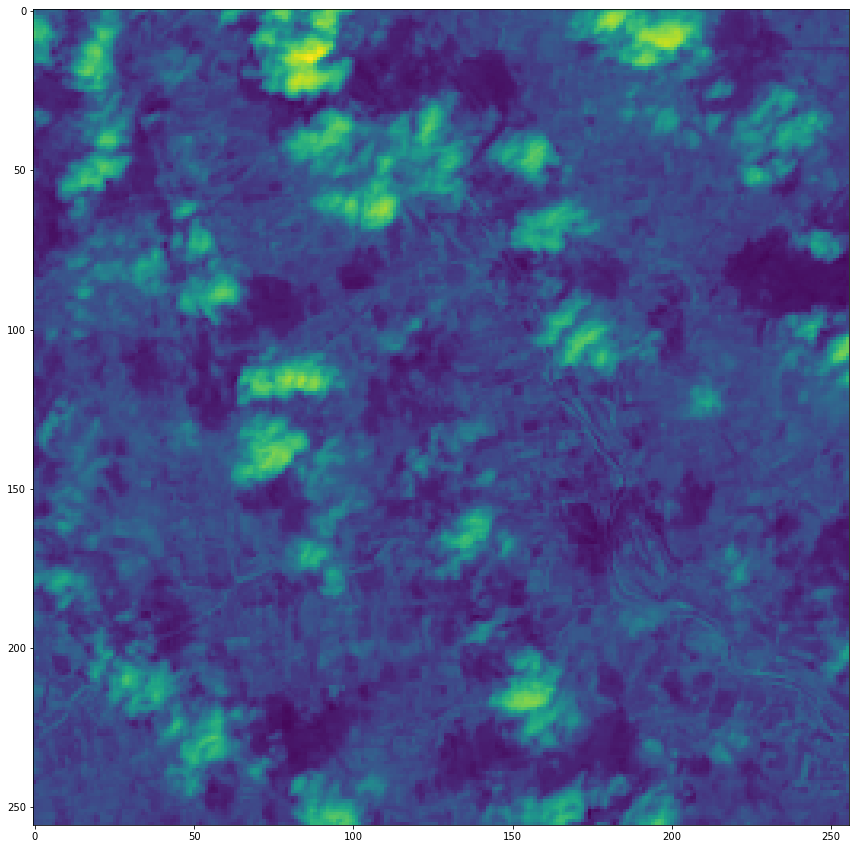

In [ ]:
fig= plt.figure(figsize=(20,15))
plt.imshow(test_img_data[1])

In [ ]:
height, width= img_data[0].shape

In [ ]:
img_data[0]

array([[10187, 10191, 10377, ..., 10867, 11558, 11543],
       [10233, 10241, 10433, ..., 10599, 11009, 11156],
       [10234, 10206, 10260, ..., 10408, 10795, 11114],
       ...,
       [11072, 11354, 11532, ..., 11857, 11874, 11552],
       [11616, 11112, 11407, ..., 11666, 11602, 11668],
       [11211, 10648, 10814, ..., 11430, 11592, 11974]], dtype=uint16)

In [ ]:
NDVI= list()


for i in range(0,len(train_files),2):
    band4= img_data[i]
    band5= img_data[i+1]
    
    #converting into float data type
    red= band4.astype('float32')
    nir= band5.astype('float32')
    
    #computation of ndvi
    ndvi= np.where((nir+red)==0.,0,(nir-red)/(nir+red))

    NDVI.append(ndvi)
    

In [ ]:
NDVI_test= list()


for i in range(0,len(test_files),2):
    band4= test_img_data[i]
    band5= test_img_data[i+1]
    
    #converting into float data type
    red= band4.astype('float32')
    nir= band5.astype('float32')
    
    #computation of ndvi
    ndvi= np.where((nir+red)==0.,0,(nir-red)/(nir+red))

    NDVI_test.append(ndvi)
    

In [ ]:
del band4,band5,red, nir, ndvi, img_data

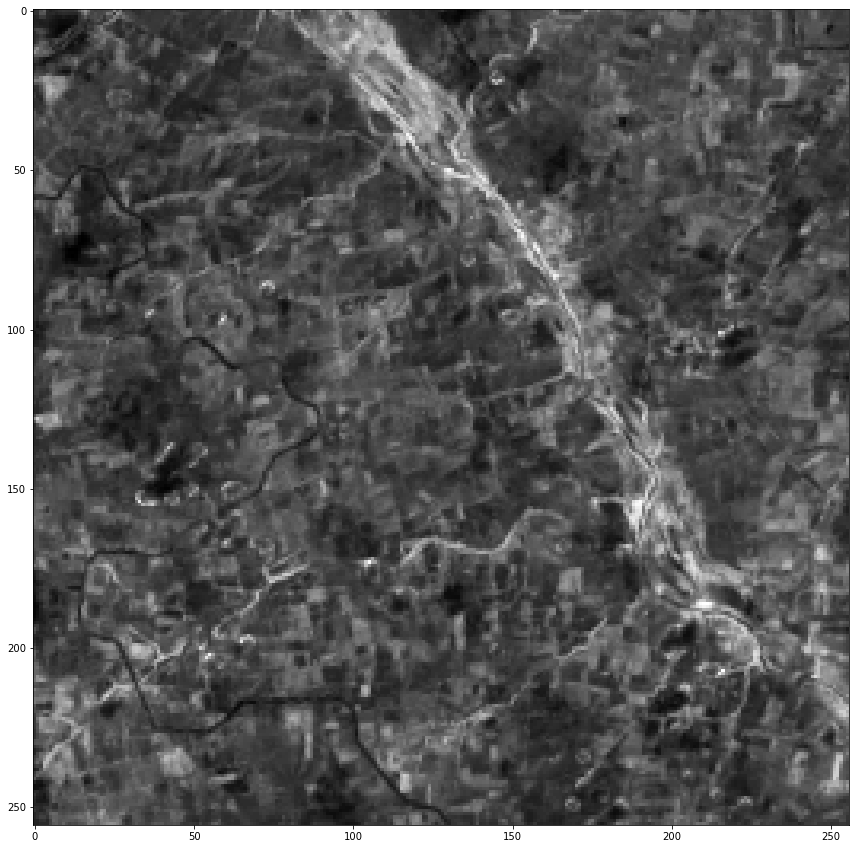

In [ ]:
fig= plt.figure(figsize=(20,15))
plt.imshow(NDVI_test[1],cmap="gray")

In [ ]:
# NDVI_mean= list()
# for i in range(len(NDVI)):
#     NDVI_mean.append(np.mean(NDVI[i]))

In [ ]:
#to calculate the mean ndvi values of an image

NDVI_mean= list()
for i in range(len(NDVI)):
    NDVI_mean.append(np.true_divide(NDVI[i].sum(),(NDVI[i]!=0).sum()))

In [ ]:
#to calculate the mean ndvi values of an image

NDVI_mean= list()
for i in range(len(NDVI_test)):
    NDVI_mean.append(np.true_divide(NDVI_test[i].sum(),(NDVI_test[i]!=0).sum()))

In [ ]:
len(NDVI_mean)

22

In [ ]:
all_ndvi_mean= np.mean(NDVI_mean)

In [ ]:
all_ndvi_mean

0.13130070591207701

In [ ]:
Dev_NDVI= NDVI_mean- all_ndvi_mean

In [ ]:
Dev_NDVI

array([ 0.07196989,  0.03135393,  0.00597092, -0.00988859, -0.01598837,
       -0.02340202, -0.02691324, -0.03512633, -0.0287071 , -0.03910149,
       -0.03377921, -0.02226676, -0.07847967,  0.01876743, -0.1132141 ,
        0.0755922 , -0.11982794,  0.19577206, -0.12719046,  0.09312449,
        0.0967143 ,  0.08462006])

In [ ]:
Label=list()
for i in range(len(Dev_NDVI)):
    if (Dev_NDVI[i]<(-0.2)):
        Label.append(0)
        print("Sever drought (extremely dry)")
    elif ((-0.2)<Dev_NDVI[i]<(-0.05)):
        Label.append(1)
        print("Drought (moderately dry) ")
    elif ((-0.05)<Dev_NDVI[i]<(0.1)):
        Label.append(2)
        print("Near normal")
    else :
        Label.append(3)
        print("Above optimum (extremely wet)")
    

Near normal
Near normal
Near normal
Near normal
Near normal
Near normal
Near normal
Near normal
Near normal
Near normal
Near normal
Near normal
Drought (moderately dry) 
Near normal
Drought (moderately dry) 
Near normal
Drought (moderately dry) 
Above optimum (extremely wet)
Drought (moderately dry) 
Near normal
Near normal
Near normal


In [ ]:
len(Label)

22

### Model Architecture


In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
train_ndvi, pred= split_sequence(NDVI, 4)

NameError: ignored

In [ ]:
pred[0]

In [ ]:
train_ndvi.shape

In [ ]:
type(NDVI[0])

In [ ]:
# textfile = open("a_file.txt", "w")
# for element in NDVI:
#     textfile.write(element + "\n")
# textfile.close()


a_file = open("test.txt", "w")
for row in NDVI:
    np.savetxt(a_file, row)

a_file.close()

In [ ]:
c_file = open("test_img.txt", "w")
for row in NDVI_test:
    np.savetxt(c_file, row)

c_file.close()

In [ ]:
original_array = np.loadtxt("test.txt").reshape(91, 256, 256)

In [ ]:
original_array[0]

In [ ]:
len(NDVI)

In [ ]:
label_train= train_label[4:91]

In [ ]:
NDVI_arr.shape

In [ ]:
length= train_ndvi.shape[0]
n_steps= 4

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator 
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.merge import concatenate


In [ ]:
# first input model
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv2D(filters=64, kernel_size=2, activation='relu')(visible1)
cnn1 = MaxPooling2D(pool_size=2)(cnn1)
cnn1 = Flatten()(cnn1)
# second input model
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv2D(filters=64, kernel_size=2, activation='relu')(visible2)
cnn2 = MaxPooling2D(pool_size=2)(cnn2)
cnn2 = Flatten()(cnn2)
# merge input models
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)
model = Model(inputs=[visible1, visible2], outputs=output)
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit([X1, X2], y, epochs=1000, verbose=0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, TimeDistributed, Dropout, LSTM
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16

In [ ]:

# create a VGG16 "model", we will use
# image with shape (224, 224, 3)
vgg = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(height, width, 1)
)
# do not train first layers, I want to only train
# the 4 last layers (my own choice, up to you)
for layer in vgg.layers[:-4]:
    layer.trainable = False

In [ ]:

model = Sequential()
# define CNN model
# model.add(TimeDistributed(vgg, input_shape=(4, height, width, 3)))
model.add(TimeDistributed(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(91,n_steps,height,width,1))))
model.add(TimeDistributed(MaxPooling2D(pool_size=(3, 3))))
model.add(TimeDistributed(Conv2D(16, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
# define LSTM model
model.add(LSTM(256, activation='relu'))
# model.add(Dense())
# finalize with standard Dense, Dropout...
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(4, activation='softmax'))
model.compile('adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
test_label= to_categorical(Label)

In [ ]:
b_file = open("test_label.txt", "w")
for row in test_label:
    np.savetxt(b_file, row)

b_file.close()

In [ ]:
b_file = open("label.txt", "w")
for row in train_label:
    np.savetxt(b_file, row)

b_file.close()

In [ ]:
label_array = np.loadtxt("label.txt").reshape(91, 4)

In [ ]:
train_label.shape

In [ ]:
label_array

In [ ]:
train_label

In [ ]:
NDVI_arr= np.array(NDVI)

In [ ]:
NDVI_arr= NDVI_arr.reshape(NDVI_arr.shape[0],height, width, 1)

In [ ]:
width

In [ ]:
train_ndvi= train_ndvi.reshape(train_ndvi.shape[0],train_ndvi.shape[1],height, width, 1)

In [ ]:
NDVI_arr


In [ ]:
train_label.shape

In [ ]:
history= model.fit(train_ndvi[:30],label_train[:30],batch_size=2,epochs=10)

In [ ]:
history= model.fit(NDVI_arr,train_label,batch_size=5,epochs=10)

In [ ]:
len(NDVI)

In [ ]:
model.summary()

In [ ]:
path='NDVI'
file_names=os.listdir(path)

### ConvLstm Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, ConvLSTM2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
steps = 4
height = 256
width = 256
input_channels = 1


In [ ]:
# model= Sequential()
inp = tf.keras.Input(shape=(steps, height, width, input_channels))
layer1 = tf.keras.layers.ConvLSTM2D(32, kernel_size=3,activation='relu',padding='same')(inp)
layer2= tf.keras.layers.Dense(16,activation='relu')(layer1)
# layer3= tf.keras.layers.Dense(1,activation='relu')(layer2)
# layer4= tf.keras.layers.Dense(64,activation='relu')(layer3)
output= tf.keras.layers.Dense(1,activation='tanh')(layer2)
convlstm= Model(inputs=inp, outputs=output)

convlstm.compile('adam', loss='categorical_crossentropy',metrics=['accuracy'])


# model.add(ConvLSTM2D(64,(3,3),activation='relu',inputs_shape=(steps, height, width, input_channels)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(4, activation='softmax'))
# model.compile('adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
convlstm.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4, 256, 256, 1)]  0         
_________________________________________________________________
conv_lst_m2d (ConvLSTM2D)    (None, 256, 256, 32)      38144     
_________________________________________________________________
dense (Dense)                (None, 256, 256, 16)      528       
_________________________________________________________________
dense_1 (Dense)              (None, 256, 256, 1)       17        
Total params: 38,689
Trainable params: 38,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_ndvi= train_ndvi.reshape(len(train_ndvi),steps,height,width,1)
pred= pred.reshape(len(pred),height,width,1)

In [ ]:
(train_ndvi.shape)

(87, 4, 256, 256, 1)

In [ ]:
pred.shape

(87, 256, 256, 1)

In [ ]:
history= convlstm.fit(train_ndvi,pred,epochs=3)

Epoch 1/3


# SPEI

In [ ]:
pwd

'C:\\Users\\yoges\\Desktop\\Internship\\summer_internship\\Code'

In [ ]:
os.listdir()

['.ipynb_checkpoints',
 'at_raster1.tif',
 'at_raster1.tif.msk',
 'a_file.txt',
 'Geospatial Data Analysis.ipynb',
 'Ktk_landsat8(19-20)',
 'label.txt',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B1.TIF',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B2.TIF',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B3.TIF',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B4.TIF',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B5.TIF',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_RGB.TIF',
 'LC08_L2SP_148038_20201224_20210310_NdviImg.TIF',
 'LE07_L1GT_105018_20210528_20210528_02_RT_refl.tif',
 'MOD11_L2.A2018365.1755.006.2019029160834.hdf',
 'MOD13Q1.A2020353.h25v06.006.2021003224610.hdf',
 'NDVI',
 'spei01.nc',
 'SPEI_ 75.750000_  14.750000.csv',
 'test.txt',
 'testcase.TIF',
 'test_img.txt',
 'test_label.txt']

In [ ]:
df= pd.read_csv('SPEI_ 75.750000_  14.750000.csv')

In [ ]:
df

,days;spei
0,1901-01-16;-0.75538
1,1901-02-15;1.3347
2,1901-03-16;0.60468
3,1901-04-16;1.5531
4,1901-05-16;0.48295
...,...
1411,2018-08-16;-0.39354
1412,2018-09-16;-0.72936
1413,2018-10-16;-1.1927
1414,2018-11-16;-1.0013


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
(df['days;spei'])

0       1901-01-16;-0.75538
1         1901-02-15;1.3347
2        1901-03-16;0.60468
3         1901-04-16;1.5531
4        1901-05-16;0.48295
               ...         
1411    2018-08-16;-0.39354
1412    2018-09-16;-0.72936
1413     2018-10-16;-1.1927
1414     2018-11-16;-1.0013
1415     2018-12-16;0.43695
Name: days;spei, Length: 1416, dtype: object

In [ ]:
# Adding two new columns to the existing dataframe.
# splitting is done on the basis of underscore.
df[['Date','SPEI']] = (df['days;spei']).str.split(";",expand=True)

In [ ]:
type(float(df['SPEI'][0]))

float

In [ ]:
spei_label=list()
for i in range(len(df['SPEI'])):
    if float(df['SPEI'][i])>-0.5:
        spei_label.append(0)
        print('No Drought')
    elif -0.5>float(df['SPEI'][i])>-0.84:
        spei_label.append(1)
        print('Moderate Drought')
    elif -0.84>float(df['SPEI'][i])>-1.28:
        spei_label.append(2)
        print('Severe Drought')
    elif -1.28>float(df['SPEI'][i])>-1.65:
        spei_label.append(3)
        print('Extreme Drought')
    else:
        spei_label.append(4)
        print('Very Extreme Drought')

Moderate Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Moderate Drought
No Drought
No Drought
No Drought
No Drought
Extreme Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Extreme Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Severe Drought
Severe Drought
No Drought
Severe Drought
No Drought
No Drought
No Drought
No Drought
Moderate Drought
No Drought
Moderate Drought
Severe Drought
No Drought
Very Extreme Drought
No Drought
Moderate Drought
No Drought
No Drought
No Drought
No Drought
Very Extreme Drought
Severe Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Moderate Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Extreme Drought
No Drought
No Drought
No Drought
No Drought
Very Extreme Droug

No Drought
No Drought
Severe Drought
No Drought
Extreme Drought
Extreme Drought
Moderate Drought
No Drought
No Drought
No Drought
No Drought
Severe Drought
Extreme Drought
Moderate Drought
No Drought
Severe Drought
No Drought
No Drought
No Drought
No Drought
Extreme Drought
Severe Drought
No Drought
Severe Drought
No Drought
No Drought
No Drought
Severe Drought
No Drought
No Drought
Severe Drought
No Drought
Severe Drought
Severe Drought
No Drought
Severe Drought
No Drought
Moderate Drought
Moderate Drought
No Drought
Extreme Drought
Extreme Drought
No Drought
Severe Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Extreme Drought
No Drought
No Drought
No Drought
Moderate Drought
No Drought
No Drought
No Drought
No Drought
Moderate Drought
No Drought
No Drought
Extreme Drought
Severe Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Moderate Drought
Severe Drought
No Drought
No Drought
Moderate Drought
Moderate Drought
No Drought
No Drou

In [ ]:
spei_label

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 4,
 0,
 1,
 0,
 0,
 0,
 0,
 4,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 3,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 4,
 4,
 2,
 0,
 4,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 1,
 3,
 0,


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
train_spei, pred= split_sequence(df['SPEI'], 4)

In [ ]:
train_spei.shape

(1412, 4)

# Model Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
model= Sequential()
model.add(LSTM(4,input_shape=(1,1)))
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x = Input(shape=(4,1))
type(x)

tensorflow.python.keras.engine.keras_tensor.KerasTensor

# Reading an image 

In [ ]:
import cv2

In [ ]:
pwd

'C:\\Users\\yoges\\Desktop\\Internship\\summer_internship\\Code'

In [ ]:
os.listdir()

['.ipynb_checkpoints',
 'at_raster1.tif',
 'at_raster1.tif.msk',
 'a_file.txt',
 'Geospatial Data Analysis.ipynb',
 'Ktk_landsat8(19-20)',
 'label.txt',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B1.TIF',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B2.TIF',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B3.TIF',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B4.TIF',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_B5.TIF',
 'LC08_L2SP_148038_20201224_20210310_02_T1_SR_RGB.TIF',
 'LC08_L2SP_148038_20201224_20210310_NdviImg.TIF',
 'LE07_L1GT_105018_20210528_20210528_02_RT_refl.tif',
 'MOD11_L2.A2018365.1755.006.2019029160834.hdf',
 'MOD13Q1.A2020353.h25v06.006.2021003224610.hdf',
 'NDVI',
 'smi_jan_2016.nc',
 'spei01.nc',
 'SPEI_ 75.750000_  14.750000.csv',
 'SPEI_threshold_values.png',
 'test.txt',
 'testcase.TIF',
 'test_img.txt',
 'test_label.txt']

In [ ]:
path='SMI_jan2016.png'
# img= cv2.imread(path)

In [ ]:
# Displaying the image
cv2.imshow('img', img)
# cv2.waitKey(0)
# cv2.destoryAllWindows()

In [ ]:
plt.show()

In [ ]:
im= img.imread(path)

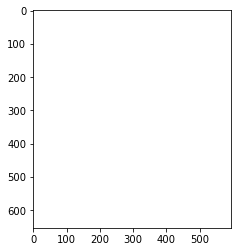

In [ ]:
# show image
plt.imshow(im)

# smi

In [ ]:
df1=pd.read_csv('smi_moonsoon_2018.csv',skiprows=1)  #skiprows is to skip number of rows from starting
df2=pd.read_csv('smi_moonsoon_2019.csv',skiprows=1)
df3=pd.read_csv('smi_moonsoon_2020.csv',skiprows=1)
df4=pd.read_csv('smi_postmoonsoon_2018.csv',skiprows=1)
df5=pd.read_csv('smi_postmoonsoon_2018.csv',skiprows=1)
df6=pd.read_csv('smi_postmoonsoon_2018.csv',skiprows=1)

In [ ]:
df1.head()

,state_name,district,jun01,jun02,jun03,jun04,jun05,jun06,jun07,jun08,...,sep21,sep22,sep23,sep24,sep25,sep26,sep27,sep28,sep29,sep30
0,Karnataka,BAGALKOT,57.555,55.934,63.139,63.430,86.327,88.112,87.031,86.387,...,50.123,46.347,42.895,39.782,49.208,65.473,60.490,57.387,53.761,49.012
1,Karnataka,BANGALORE RURAL,92.816,92.471,89.758,86.368,83.664,79.047,75.165,75.638,...,78.237,73.332,73.670,85.607,88.358,93.712,91.609,88.617,84.036,79.483
2,Karnataka,BANGLORE URBAN,95.086,93.280,90.424,86.911,83.421,79.249,76.926,77.653,...,83.674,78.317,84.390,90.460,92.744,92.791,90.935,87.133,82.609,79.432
3,Karnataka,BELGAUM,66.050,70.201,79.090,81.524,90.622,92.151,89.906,88.613,...,60.690,57.563,53.148,49.246,57.211,87.619,84.307,85.770,83.256,77.721
4,Karnataka,BELLARY,78.599,82.181,81.811,76.473,73.684,69.046,87.026,85.225,...,44.944,41.077,40.264,38.763,48.922,56.873,54.520,51.177,46.910,43.405


In [ ]:
df1.shape

(30, 124)

In [ ]:
df1.iloc[:,0]

0     Karnataka
1     Karnataka
2     Karnataka
3     Karnataka
4     Karnataka
5     Karnataka
6     Karnataka
7     Karnataka
8     Karnataka
9     Karnataka
10    Karnataka
11    Karnataka
12    Karnataka
13    Karnataka
14    Karnataka
15    Karnataka
16    Karnataka
17    Karnataka
18    Karnataka
19    Karnataka
20    Karnataka
21    Karnataka
22    Karnataka
23    Karnataka
24    Karnataka
25    Karnataka
26    Karnataka
27    Karnataka
28    Karnataka
29    Karnataka
Name: state_name, dtype: object

In [ ]:
# skip the Na values while finding the mean
mean_monsoon_2018= df1.mean(axis = 0, skipna = True)
mean_monsoon_2019= df2.mean(axis = 0, skipna = True)
mean_monsoon_2020= df3.mean(axis = 0, skipna = True)
mean_postmonsoon_2018= df4.mean(axis = 0, skipna = True)
mean_postmonsoon_2019= df5.mean(axis = 0, skipna = True)
mean_postmonsoon_2020= df6.mean(axis = 0, skipna = True)

In [ ]:
mean_monsoon_2018

jun01    75.160967
jun02    77.933167
jun03    79.040067
jun04    77.392867
jun05    78.447967
           ...    
sep26    71.141733
sep27    72.308200
sep28    73.088400
sep29    71.327200
sep30    67.322233
Length: 122, dtype: float64

In [ ]:
str1=(df1.columns[2:])

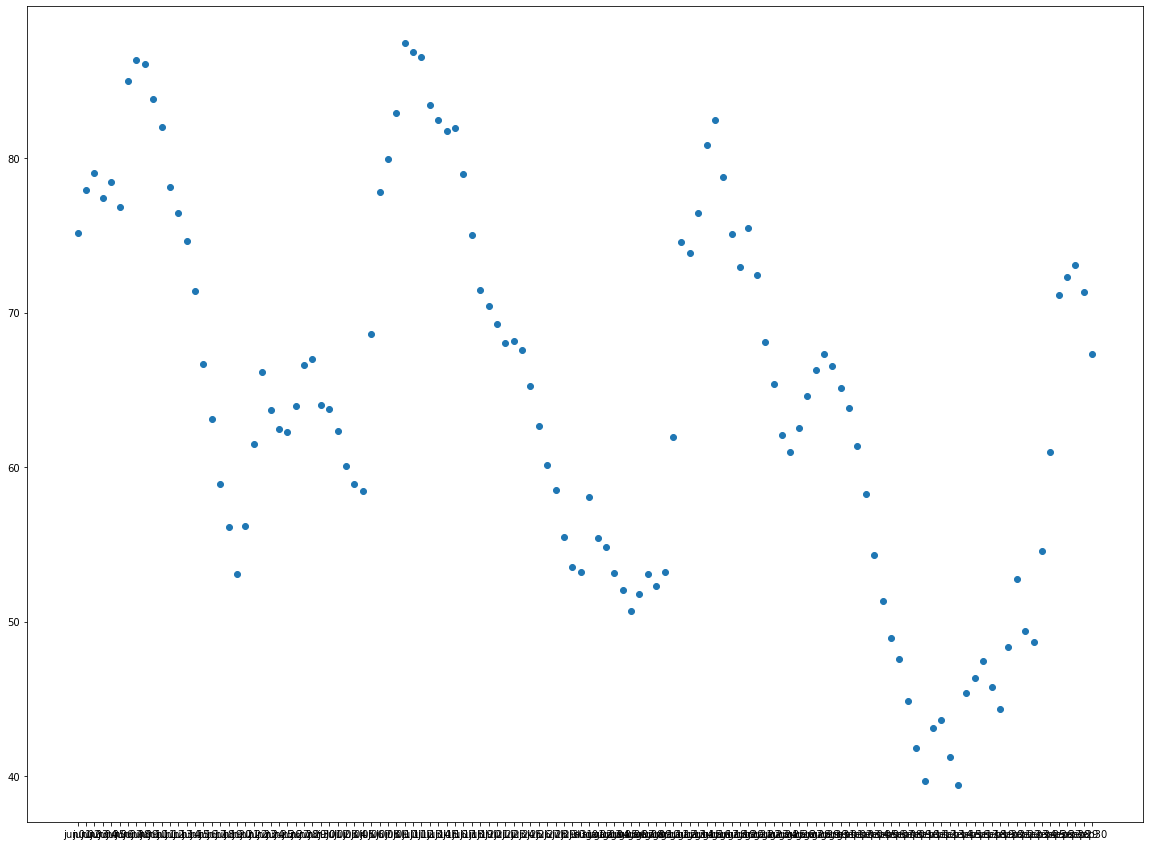

In [ ]:
fig= plt.figure(figsize=(20,15))
x = np.array(range(0,122))
plt.xticks(x, str1)
plt.scatter(x,mean_monsoon_2018)

In [ ]:
str2=(df2.columns[2:])

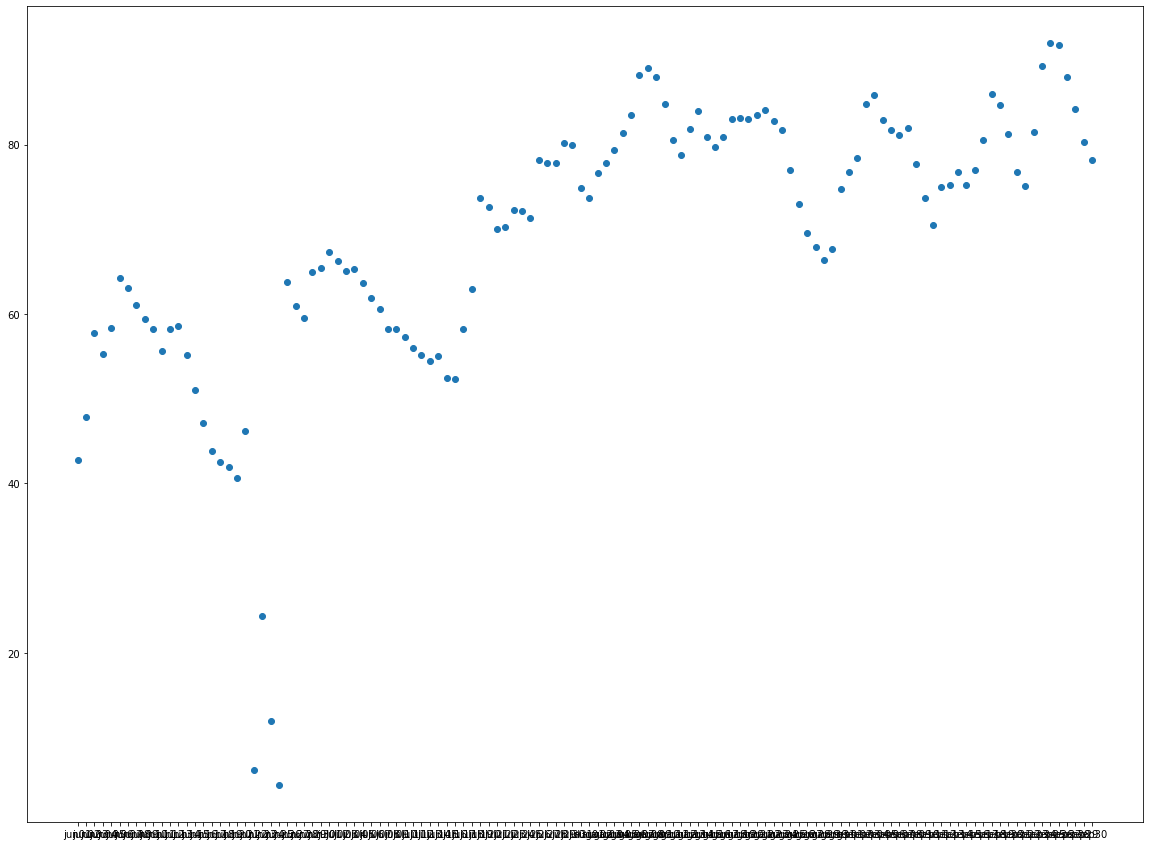

In [ ]:
fig= plt.figure(figsize=(20,15))
x = np.array(range(0,122))
plt.xticks(x, str2)
plt.scatter(x,mean_monsoon_2019)

In [ ]:
str3=(df3.columns[2:])

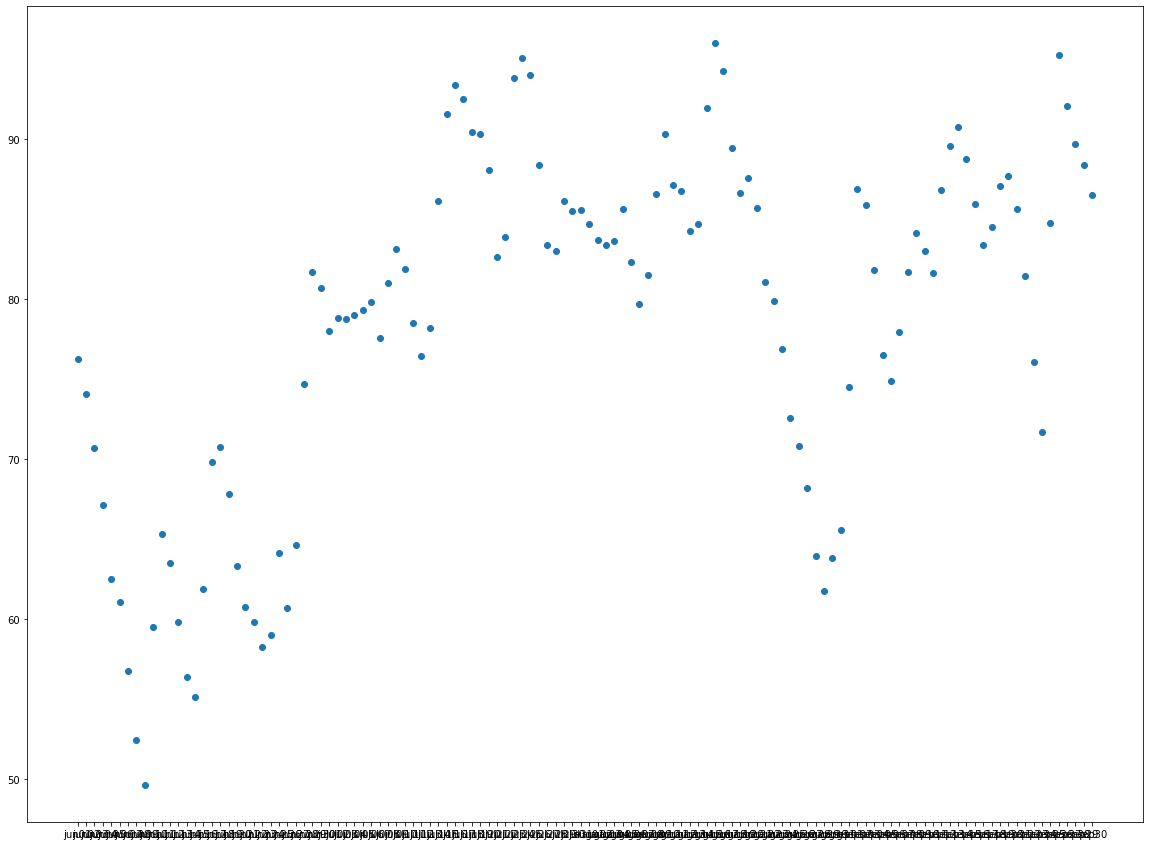

In [ ]:
fig= plt.figure(figsize=(20,15))
x = np.array(range(0,122))
plt.xticks(x, str3)
plt.scatter(x,mean_monsoon_2020)

In [ ]:
str4=(df4.columns[2:])
len(str4)

151

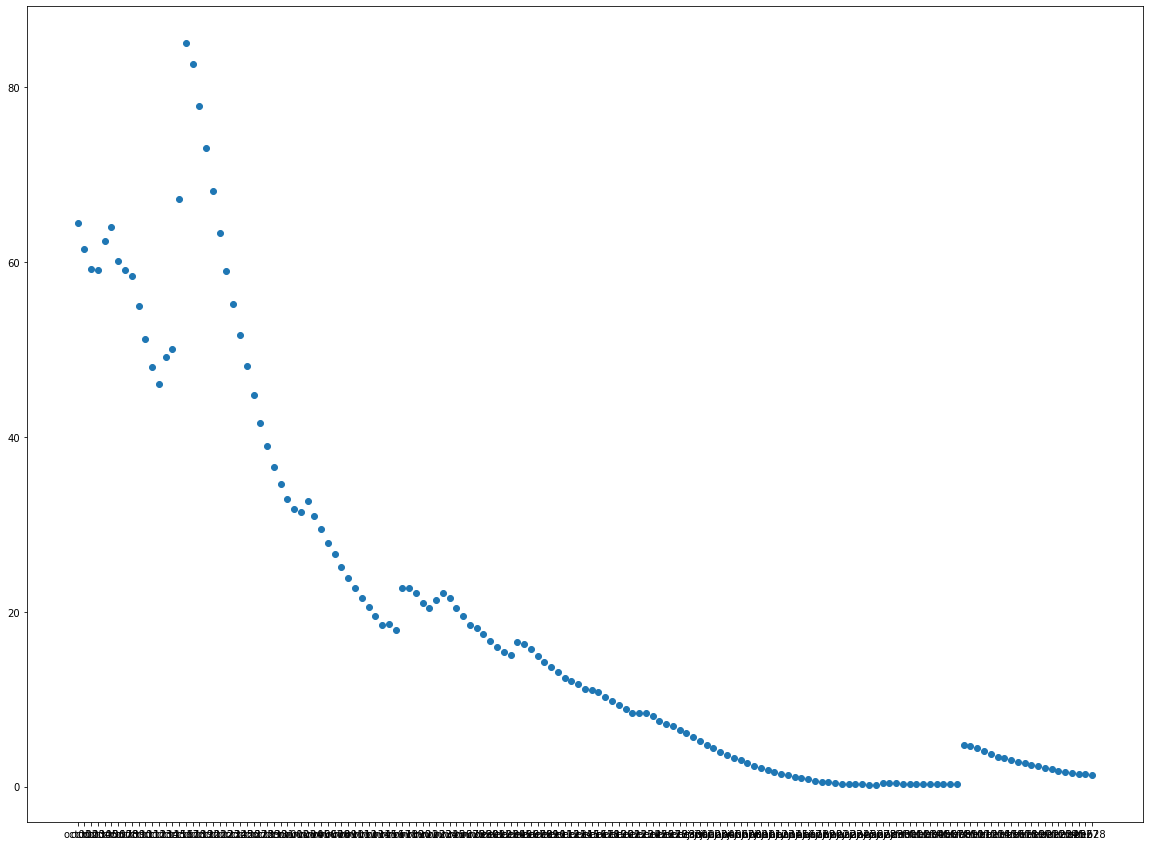

In [ ]:
fig= plt.figure(figsize=(20,15))
x = np.array(range(0,151))
plt.xticks(x, str4)
plt.scatter(x,mean_postmonsoon_2018)

In [ ]:
str5=(df5.columns[2:])

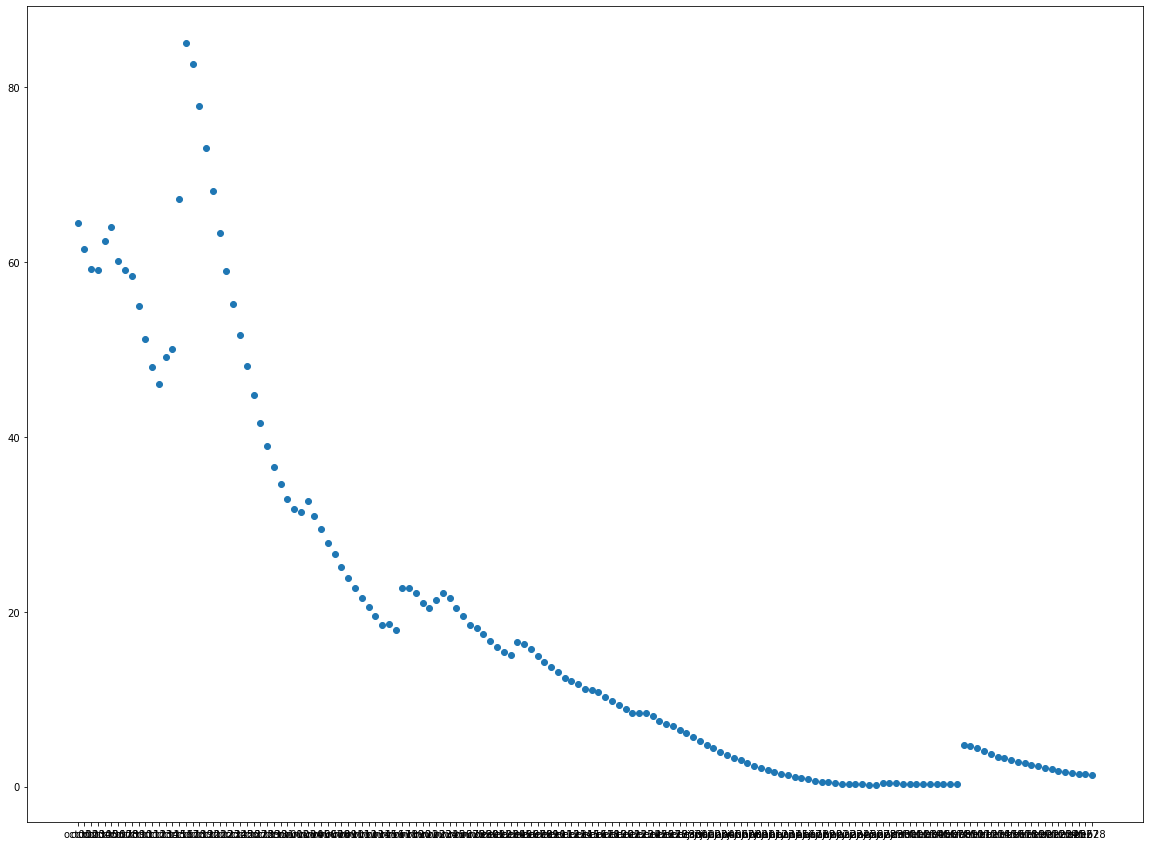

In [ ]:
fig= plt.figure(figsize=(20,15))
x = np.array(range(0,151))
plt.xticks(x, str5)
plt.scatter(x,mean_postmonsoon_2019)

In [ ]:
str6=(df6.columns[2:])

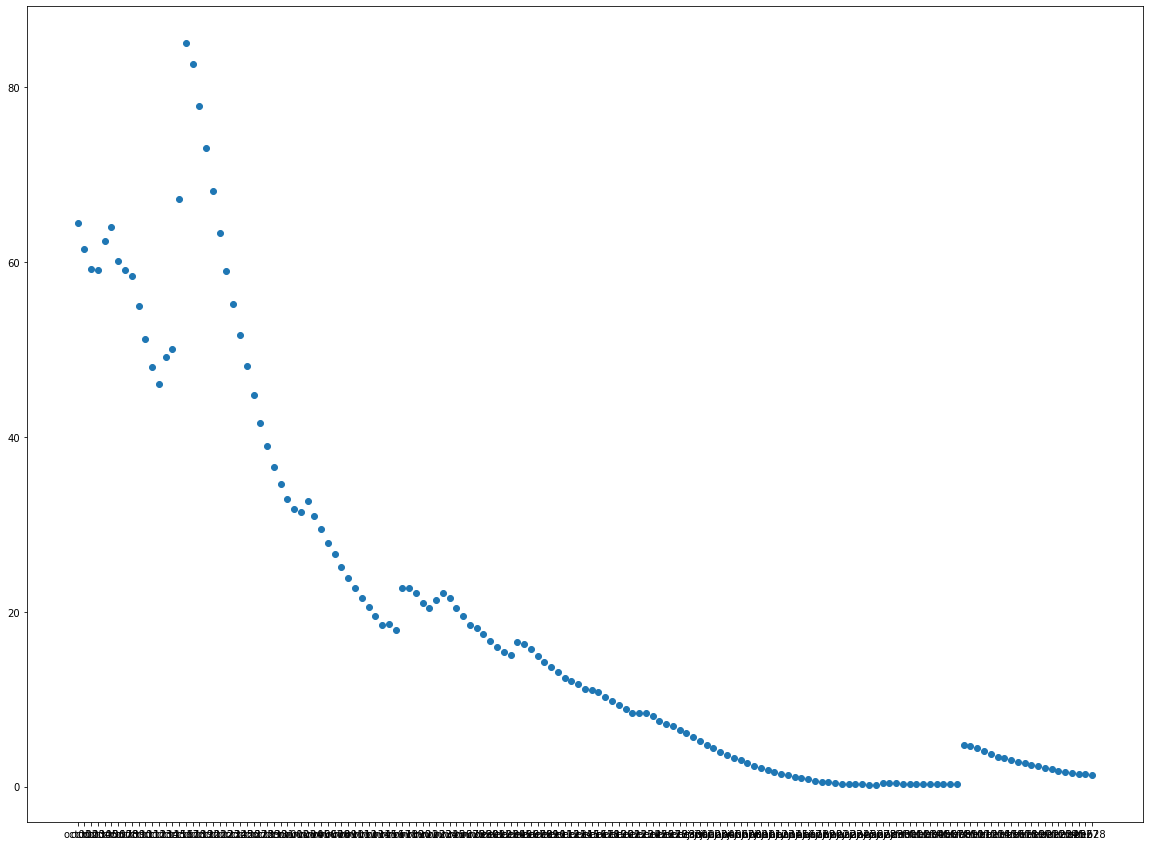

In [ ]:
fig= plt.figure(figsize=(20,15))
x = np.array(range(0,151))
plt.xticks(x, str6)
plt.scatter(x,mean_postmonsoon_2020)

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

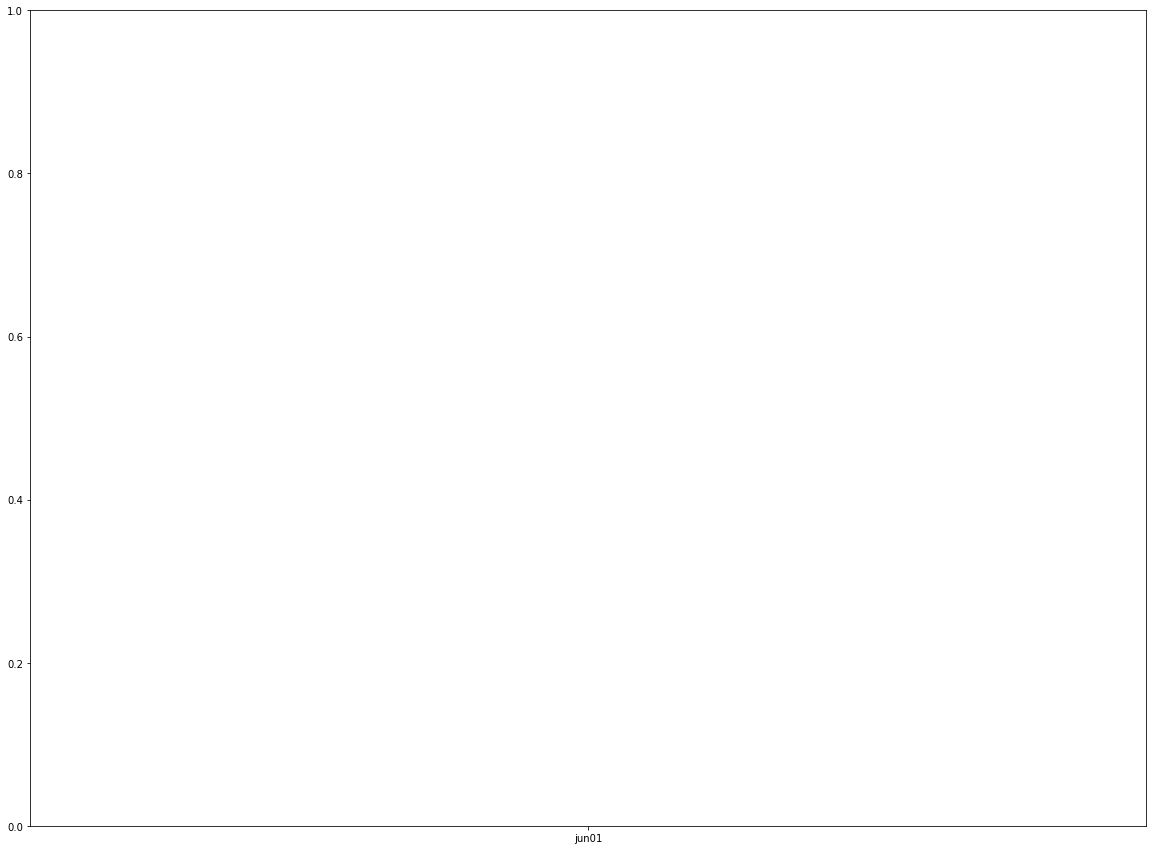

In [ ]:
fig= plt.figure(figsize=(20,15))
plt.scatter(df1.columns[2:],mean_monsoon_2018[:],'rs-')